In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
plt.style.use(pubStyle)

In [184]:
x = np.linspace(24231, 24231+10, 500)*86400
y = np.sin(x/4000)# + np.sin(20*x)# + np.random.normal(scale=1.5, size=x.shape)

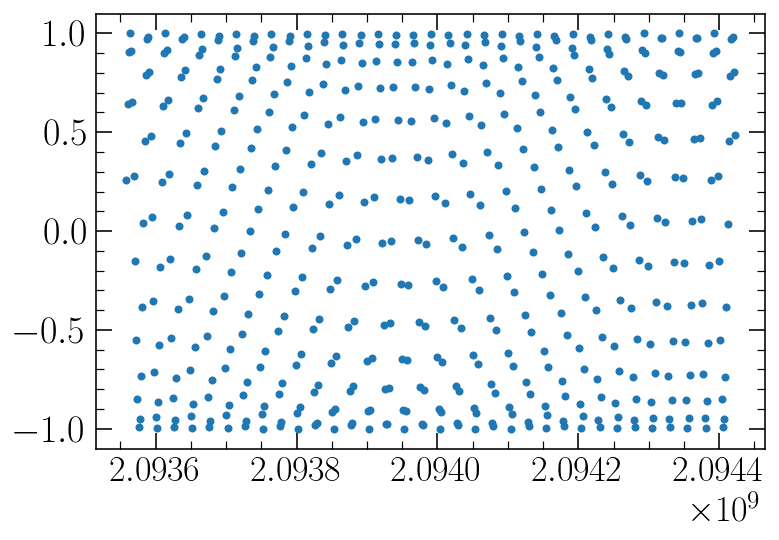

In [186]:
plt.plot(x, y, '.')
# plt.xlim(x[0], x[0]+86400)

In [187]:
fs = np.mean(x[1:] - x[:-1])
freq, power = periodogram(y, fs=fs)

Text(0.5, 0, 'Frequency [Hz]')

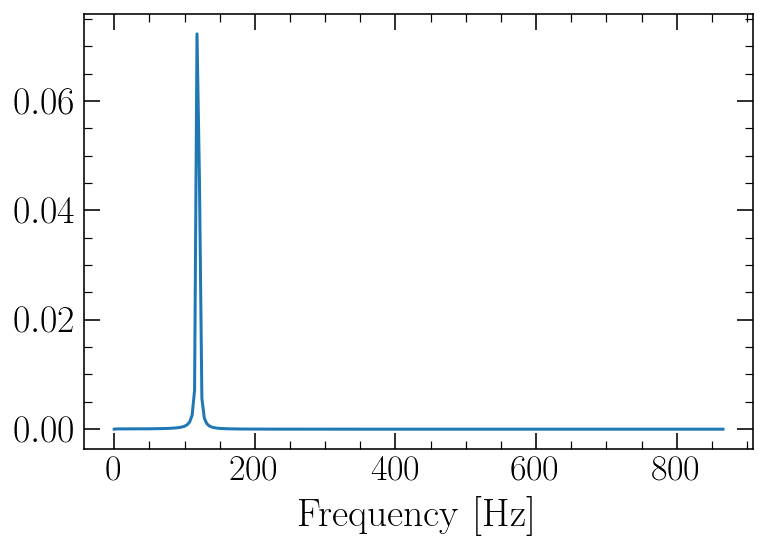

In [188]:
plt.plot(freq, power)
plt.xlabel("Frequency [Hz]")

In [162]:
0.0065 #1/day

0.0065

In [152]:
1/0.0063

158.73015873015873

In [131]:
fs

0.02004008016032064

In [132]:
1/fs

49.9

In [133]:
fs

0.02004008016032064

In [134]:
fs * 1

0.02004008016032064

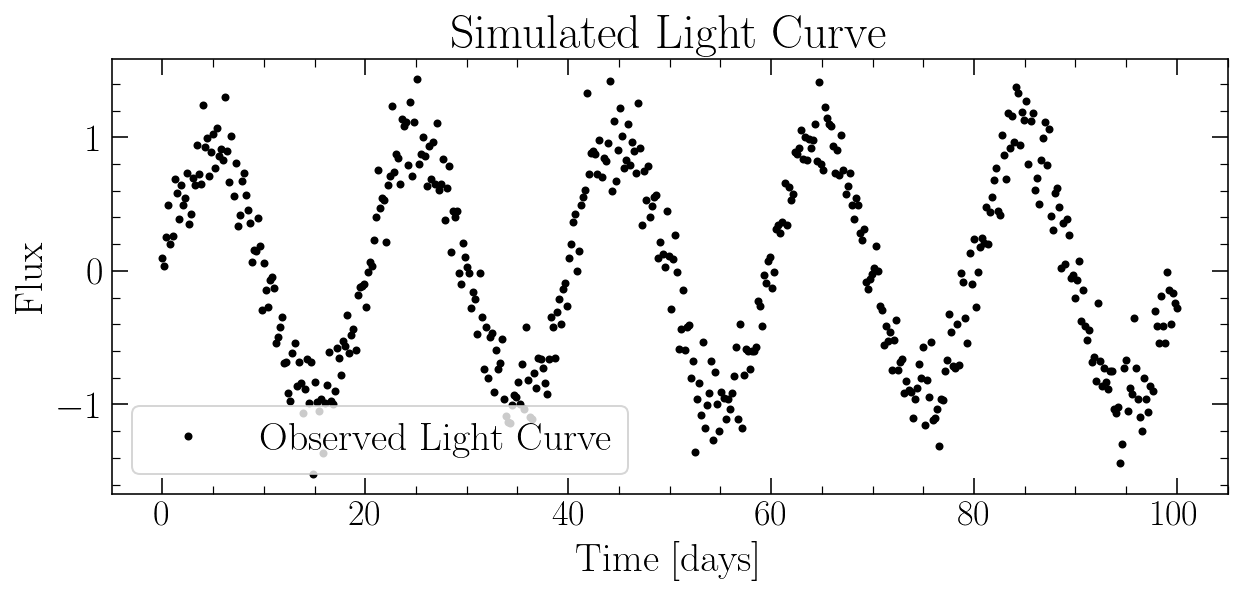

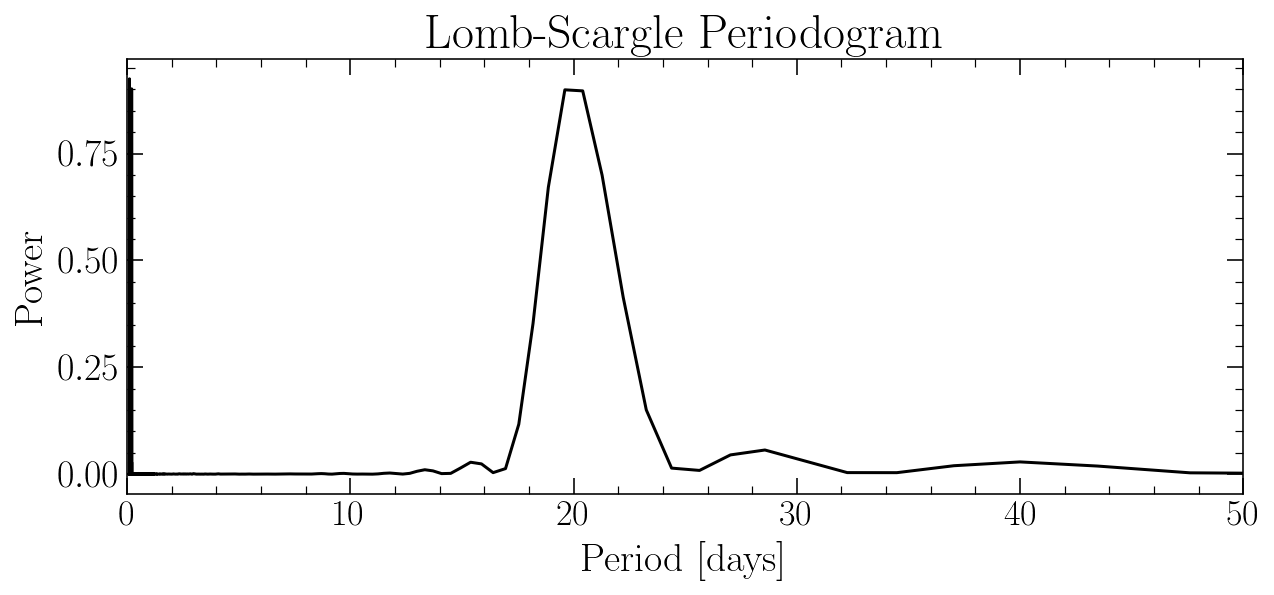

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

# Set the random seed for reproducibility
np.random.seed(42)

# Generate sample time data
time = np.linspace(0, 100, 500)  # 500 time points over 100 days

# Generate a periodic signal with some noise
period = 20  # Period of the signal in days
amplitude = 1.0
signal = amplitude * np.sin(2 * np.pi * time / period)

# Add noise
noise = np.random.normal(0, 0.2, size=time.shape)
light_curve = signal + noise

# Plot the light curve
plt.figure(figsize=(10, 4))
plt.plot(time, light_curve, 'k.', label='Observed Light Curve')
plt.xlabel('Time [days]')
plt.ylabel('Flux')
plt.title('Simulated Light Curve')
plt.legend()
plt.show()

# Compute the Lomb-Scargle periodogram
frequency, power = LombScargle(time, light_curve).autopower()

# Plot the Lomb-Scargle periodogram
plt.figure(figsize=(10, 4))
plt.plot(1/frequency, power, 'k-')
plt.xlabel('Period [days]')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram')
plt.xlim(0, 50)
plt.show()


In [190]:
time

array([  0.        ,   0.2004008 ,   0.4008016 ,   0.6012024 ,
         0.80160321,   1.00200401,   1.20240481,   1.40280561,
         1.60320641,   1.80360721,   2.00400802,   2.20440882,
         2.40480962,   2.60521042,   2.80561122,   3.00601202,
         3.20641283,   3.40681363,   3.60721443,   3.80761523,
         4.00801603,   4.20841683,   4.40881764,   4.60921844,
         4.80961924,   5.01002004,   5.21042084,   5.41082164,
         5.61122244,   5.81162325,   6.01202405,   6.21242485,
         6.41282565,   6.61322645,   6.81362725,   7.01402806,
         7.21442886,   7.41482966,   7.61523046,   7.81563126,
         8.01603206,   8.21643287,   8.41683367,   8.61723447,
         8.81763527,   9.01803607,   9.21843687,   9.41883768,
         9.61923848,   9.81963928,  10.02004008,  10.22044088,
        10.42084168,  10.62124248,  10.82164329,  11.02204409,
        11.22244489,  11.42284569,  11.62324649,  11.82364729,
        12.0240481 ,  12.2244489 ,  12.4248497 ,  12.62

In [191]:
import pandas as pd

In [195]:
df = pd.DataFrame({"time": time, "flux": light_curve})

In [196]:
df

,time,flux
0,0.000000,0.099343
1,0.200401,0.035263
2,0.400802,0.255121
3,0.601202,0.492358
4,0.801603,0.202347
...,...,...
495,99.198397,-0.141396
496,99.398798,-0.395202
497,99.599198,-0.163651
498,99.799599,-0.238040


In [197]:
df.to_csv("lc.dat", index=False)

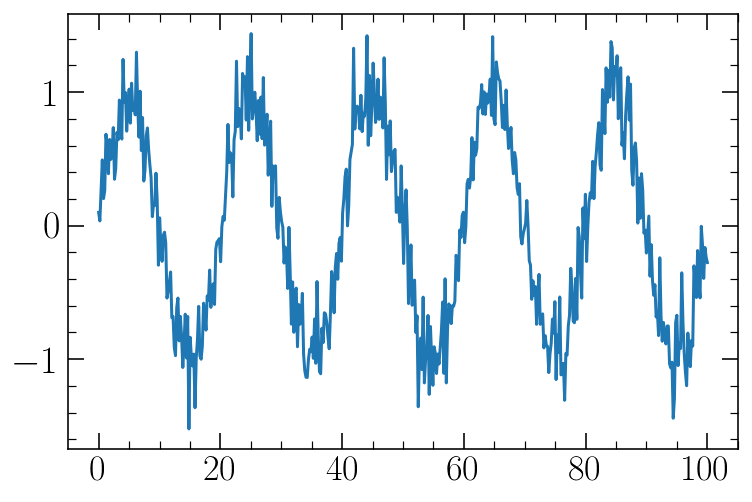

In [199]:
plt.plot(df.time.values, df.flux.values)